## 1: Supervised ML-KNN

In [1]:
# pandas
import pandas as pd

# sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading our data set
# last portion of code is meant to separate data 
bank = pd.read_csv('assign_wk7/bank-additional-full.csv', sep=';')

In [3]:
bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Creating a copy of the dataset incase I want to revert back to original column types:

In [5]:
bank_copy = bank.copy()

In [6]:
bank_copy.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Assessing values within multiple categorical variables:

In [7]:
bank["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [34]:
bank["cons.conf.idx"].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

In [8]:
bank["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [9]:
bank["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [10]:
bank["poutcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [11]:
bank["housing"].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [12]:
bank["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [13]:
bank["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [14]:
bank["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Converting many categorcial variable values to int's-as seen below I lumped "unknown" into the value with the highest count for each variable:

In [15]:
cleanup_nums = {"housing": {"yes": 1, "no": 0,"unknown": 1},
                "loan":    {"yes": 1, "no": 0,"unknown": 0},
                "default": {"yes": 1, "no": 0,"unknown": 0},
                "y":       {"yes": 1, "no": 0},
                "marital": {"married":0,"unknown":0,"single":1,"divorced":2},
                "job":     {"admin.":0,"unknown":0,"blue-collar":1,"technician":2,"services":3,"management":4,
                            "retired":5,"entrepreneur":6,"self-employed":7,"housemaid":8,"unemployed":9,
                            "student":10},
                "education": {"university.degree":0,"unknown":0,"high.school":1,"basic.9y":2,"professional.course":3,
                              "basic.4y":4,"basic.6y":5,"illiterate":6},
                "poutcome": {"nonexistent":0,"failure":1,"success":2}}

In [16]:
bank = bank.replace(cleanup_nums)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,8,0,4,0,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,3,0,1,0,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,3,0,1,0,1,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,0,5,0,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,3,0,1,0,0,1,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


Ensuring converted variables are infact int's now:

In [17]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [18]:
bank.describe()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.427455,0.504807,1.592843,0.000073,0.547878,0.151695,258.285010,2.567593,962.475454,0.172963,0.169904,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.600579,0.688431,1.567091,0.008534,0.497708,0.358729,259.279249,2.770014,186.910907,0.494901,0.455754,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,180.000000,2.000000,999.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,4.000000,1.000000,3.000000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,10.000000,2.000000,6.000000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


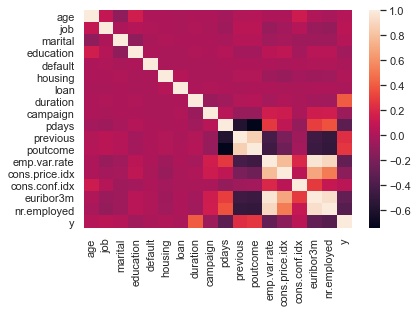

In [19]:
_ = sns.heatmap(bank.corr())

Per above, previous/job/poutcome/cons.conf.idx seem to have highest correlation with y. Will drop rest of columns below:

In [21]:
# trimming our data
bank.drop(['age','default','cons.price.idx','housing','loan','pdays','contact','month','day_of_week','emp.var.rate', 
           'pdays', 'marital','duration','euribor3m','nr.employed','campaign','education'],axis=1, inplace=True)

In [22]:
bank.head(5)

,job,previous,poutcome,cons.conf.idx,y
0,8,0,0,-36.4,0
1,3,0,0,-36.4,0
2,3,0,0,-36.4,0
3,0,0,0,-36.4,0
4,3,0,0,-36.4,0


Setting up y as target column & remaining as features:

In [23]:
cols = bank.columns
target_col = 'y'
feat_cols = [c for c in cols if c != target_col]

X = bank[feat_cols].values
y = bank[target_col].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Outcome for y (subscription) is yes/no therefore discrete...based on this I'll use a KNN Classifier model:

In [25]:
# define and fit model
model = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)

In [26]:
# gather the predictations that model made for test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[0 0 0 ... 0 1 0]
Predictions for test data set
[0 0 0 ... 0 0 0]


In [27]:
#compare the two sets for 'subscribed'
differs = y_test - preds
print('Differences between the two sets')
print(differs)

Differences between the two sets
[0 0 0 ... 0 1 0]


Using the accuracy_score package in order to score the classification model with the current features

In [35]:

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,preds))

0.8839524156348628


~88% accuracy of predicting y when using the features involved! I'll take that as a win

In [36]:
scores = []
print(f'Features ==> {feat_cols} \nTarget ====> {target_col}\n')

# remember the ending number for range is not inclusive
for k in range(1, 3):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Features ==> ['job', 'previous', 'poutcome', 'cons.conf.idx'] 
Target ====> y

Evaluating 1 clusters
Evaluating 2 clusters


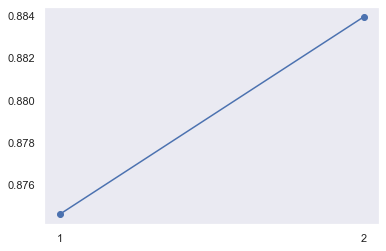

In [37]:
# display the resutls
plt.plot(range(1, 3), scores)
plt.scatter(range(1, 3), scores)
plt.grid()
_ =plt.xticks(range(1, 3))

Based on the above, knowing a person's job, the number of times a person was contacted prior to the current marketing campaign,
how a person perceived the previous marketing campaign, and the monthly consumer confidence index can result in successfully
predicting whether or not a person will subscribe a term deposit over 88% of the time.

## 2: Unsupervised ML-K-Means

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

In [49]:
# loading our data set
# last portion of code is meant to separate data 
student = pd.read_csv('assign_wk7/student-mat.csv', sep=';')

In [50]:
student.shape

(395, 33)

In [51]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Per above there are no null values in the dataset

In [52]:
student.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


Per the variances below, I don't think there is a need to normalize the numerical data:

In [79]:
student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Creating a copy of the dataset incase I want to revert back to original dataset variables:

In [53]:
student_copy = student.copy()

Checking value counts of multiple variables to ensure there aren't unexpected missing values:

In [54]:
student.famsup.value_counts()

yes    242
no     153
Name: famsup, dtype: int64

In [55]:
student.schoolsup.value_counts()

no     344
yes     51
Name: schoolsup, dtype: int64

In [56]:
student.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [60]:
student.G3.value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: G3, dtype: int64

Boxplot below differentiates students who live in urban vs rural areas & broken down by whether or not they have internet while showing the distribution of G3 grades. While students living in urban areas without internet have lower G3 scores, students living in rural areas without internet earned slightly higher G3 scores vs students in rural areas with internet (at least within the IQR).

<AxesSubplot:xlabel='address', ylabel='G3'>

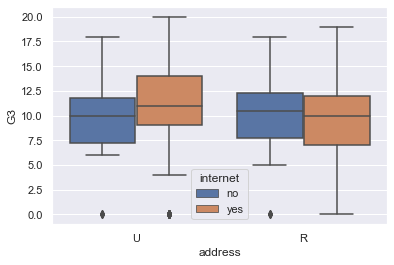

In [62]:
sns.boxplot(x ='address', y ='G3', data = student, hue ='internet')

Per the below it looks like students without any family or paid school support earn highest G3 grades:

<AxesSubplot:xlabel='paid', ylabel='G3'>

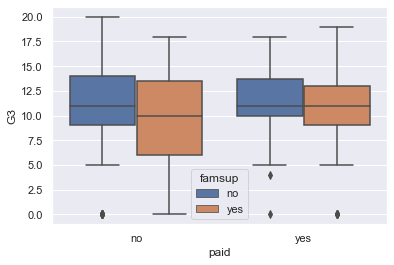

In [78]:
sns.boxplot(x ='paid', y ='G3', data = student, hue = 'famsup')

I'd think gender would be worth enumerating:

<AxesSubplot:xlabel='sex', ylabel='count'>

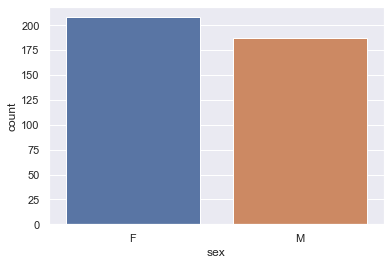

In [84]:
sns.countplot(x ='sex', data = student)

Enumerating certain categorical variables I believe are influential regarding G3 scores:

In [85]:
cleanup_nums = {"internet": {"yes": 1, "no": 0},
                "famsup":   {"yes": 1, "no": 0},
                "paid":     {"yes": 1, "no": 0},
                "address":  {"U": 1, "R": 0},
                "internet": {"yes":1,"no":0},
                "sex":      {"M":1, "F":0}}

In [86]:
student = student.replace(cleanup_nums)
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,0,18,1,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,0,17,1,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,0,15,1,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,0,15,1,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,0,16,1,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [87]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    int64 
 2   age         395 non-null    int64 
 3   address     395 non-null    int64 
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    int64 
 17  paid        395 non-null    int64 
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [89]:
# trimming our data
student.drop(['school','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','activities','nursery', 
           'higher', 'romantic'],axis=1, inplace=True)

In [90]:
student.head()

,sex,age,address,Medu,Fedu,traveltime,studytime,failures,famsup,paid,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,1,4,4,2,2,0,0,0,...,4,3,4,1,1,3,6,5,6,6
1,0,17,1,1,1,1,2,0,1,0,...,5,3,3,1,1,3,4,5,5,6
2,0,15,1,1,1,1,2,3,0,1,...,4,3,2,2,3,3,10,7,8,10
3,0,15,1,4,2,1,3,0,1,1,...,3,2,2,1,1,5,2,15,14,15
4,0,16,1,3,3,1,2,0,1,1,...,4,3,2,1,2,5,4,6,10,10


In [94]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex         395 non-null    int64
 1   age         395 non-null    int64
 2   address     395 non-null    int64
 3   Medu        395 non-null    int64
 4   Fedu        395 non-null    int64
 5   traveltime  395 non-null    int64
 6   studytime   395 non-null    int64
 7   failures    395 non-null    int64
 8   famsup      395 non-null    int64
 9   paid        395 non-null    int64
 10  internet    395 non-null    int64
 11  famrel      395 non-null    int64
 12  freetime    395 non-null    int64
 13  goout       395 non-null    int64
 14  Dalc        395 non-null    int64
 15  Walc        395 non-null    int64
 16  health      395 non-null    int64
 17  absences    395 non-null    int64
 18  G1          395 non-null    int64
 19  G2          395 non-null    int64
 20  G3          395 non-null    int6

Entirely numeric dataset-now we can work on clustering:

In [95]:
# split data into features (X) and labels (y)
X = student.iloc[:,0:20]
y = student.iloc[:,-1]

In [96]:
# Using within sum of squares to determine the optimal number of clusters for the final model. 

from sklearn.cluster import KMeans

# determine the optimal number of clusters 
sum_sq= []

# fit the model for a range of 2 to 30 clusters and add to sum_sq[]
for n in range (2,30):
    print('Calculating for ',n,' clusters')
    
    # random_start makes the results reproducible 
    # n_jobs=-1 means run with all machine processors
    model = KMeans(n_clusters=n, random_state=42, n_jobs=-1)
    model.fit(X)
    sum_sq.append(-model.score(X))

Calculating for  2  clusters
Calculating for  3  clusters
Calculating for  4  clusters
Calculating for  5  clusters
Calculating for  6  clusters
Calculating for  7  clusters
Calculating for  8  clusters
Calculating for  9  clusters
Calculating for  10  clusters
Calculating for  11  clusters
Calculating for  12  clusters
Calculating for  13  clusters
Calculating for  14  clusters
Calculating for  15  clusters
Calculating for  16  clusters
Calculating for  17  clusters
Calculating for  18  clusters
Calculating for  19  clusters
Calculating for  20  clusters
Calculating for  21  clusters
Calculating for  22  clusters
Calculating for  23  clusters
Calculating for  24  clusters
Calculating for  25  clusters
Calculating for  26  clusters
Calculating for  27  clusters
Calculating for  28  clusters
Calculating for  29  clusters


[26665.790643882192,
 20287.683986928074,
 14849.949387755101,
 13294.069004438132,
 12129.011526054594,
 11238.835714232426,
 10625.99475073269,
 10022.363766336493,
 9423.341994411168,
 8888.985740333164,
 8623.862623291754,
 8282.233980239122,
 8077.063252082441,
 7810.130482816021,
 7528.623024590144,
 7384.172038606424,
 7122.814022071732,
 7038.1913932936895,
 6833.199700313238,
 6783.131774603411,
 6675.964557314681,
 6520.914853560111,
 6427.228217845381,
 6356.439924245463,
 6267.124568220564,
 6166.974979805684,
 6054.944915464658,
 5958.169477925461]

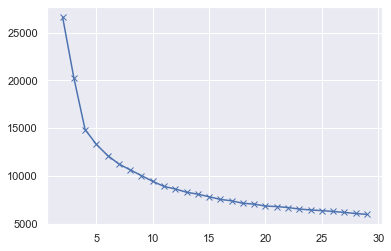

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(2, 30), sum_sq, 'bx-')
np.diff(sum_sq)
sum_sq

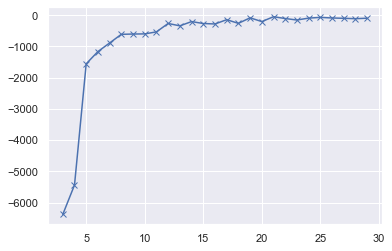

In [98]:
# compare the scree plot with a np.diff() plot

plt.plot(range(3, 30), np.diff(sum_sq), 'bx-')

Per the above plots, it seems the initial slowdown of the model occurs at ~5, so I'll go with 5 clusters.

In [111]:
# kmeans model with the optimal number of clusters, 5 clusters
model = KMeans(n_clusters=5, random_state=42, n_jobs=-1)
model.fit(X)

# gather the predictions
preds= model.predict(X)

In [112]:
from sklearn import metrics
score = metrics.silhouette_score(X, preds)
score

0.2516573019615746

Not a great score! This tells me there are likely overlapping clusters/not great distance between a sample and a cluster that isn't similar to the sample.

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

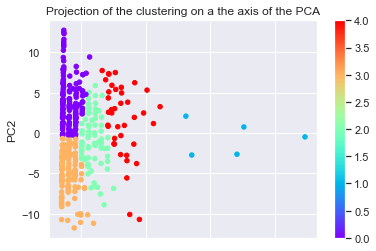

In [113]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_reduced = pca.fit_transform(X)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

In [114]:
# fit the model for a range of 2 to 30 clusters and add to sum_sq[]
for n in range (2,30):
    # random_start makes the results reproducible 
    # n_jobs=-1 means run with all machine processors
    model = KMeans(n_clusters=n, random_state=42, n_jobs=-1)
    model.fit(X)
    # gather the predictions
    preds= model.predict(X)
    score = metrics.silhouette_score(X, preds)
    print('Silhouette score for ',n,' clusters: ',score)

Silhouette score for  2  clusters:  0.44495378345571923
Silhouette score for  3  clusters:  0.33483087199289124
Silhouette score for  4  clusters:  0.28098345051622664
Silhouette score for  5  clusters:  0.2516573019615746
Silhouette score for  6  clusters:  0.20277180260835503
Silhouette score for  7  clusters:  0.1899959904581752
Silhouette score for  8  clusters:  0.1747115062025313
Silhouette score for  9  clusters:  0.1770240269734418
Silhouette score for  10  clusters:  0.15176644865120906
Silhouette score for  11  clusters:  0.16358723988752039
Silhouette score for  12  clusters:  0.1424847590777982
Silhouette score for  13  clusters:  0.14436150863701713
Silhouette score for  14  clusters:  0.15353843205013348
Silhouette score for  15  clusters:  0.14423654044454612
Silhouette score for  16  clusters:  0.13862474181299825
Silhouette score for  17  clusters:  0.13800455370044273
Silhouette score for  18  clusters:  0.141387073952352
Silhouette score for  19  clusters:  0.1371035

In [115]:
# kmeans model with the optimal number of clusters, 2 clusters
model = KMeans(n_clusters=2, random_state=42, n_jobs=-1)
model.fit(X)

# gather the predictions
preds= model.predict(X)

from sklearn import metrics
score = metrics.silhouette_score(X, preds)
score

0.44495378345571923

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

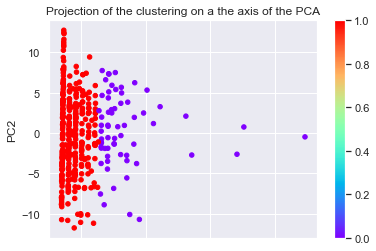

In [116]:
# visualize the clusters
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(X)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

It seems as if there isn't much variability to the dataset since the bulk of the datapoints seem to be bunched up vertically along PC2 vs PC1, so it would seem this dataset's variables are more different than they are similar to each other. I suppose my takeaway here is that I didn't include enough variables with sufficient spread, resulting in clusters that aren't very spread out from each other & don't have much in common.